<a href="https://colab.research.google.com/github/pvanand07/EDA-Hotel-Booking-Python/blob/master/EDA_HB_Temp_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Load-Clean-Wrangle

In [82]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
#Load Datas
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter Projects/Hotel Booking/Hotel Bookings.csv')

In [85]:
# Dropping Duplicate Values
df = dataset.drop_duplicates()
df.shape

(87396, 32)

In [86]:
#Droping missing values
df_1 =   df.drop(['company','agent'],axis = 1).dropna()
print('Shape of the dataset before cleaning :',dataset.shape)
print('Shape of the dataset after cleaning :',df_1.shape)

Shape of the dataset before cleaning : (119390, 32)
Shape of the dataset after cleaning : (86940, 30)


In [87]:
df_1['reservation_status_date'] = pd.to_datetime(df_1['reservation_status_date'])
df_2=df_1[(df_1['reservation_status_date']>pd.Timestamp('2015-05-01'))&((df_1['reservation_status_date']<pd.Timestamp('2017-09-01')))]

## Data Visualization

Add Booking volume vs ADR over months\
Add ADR for two hotels over months\
Total stay duration vs adr sns.scatterplot\
Room type vs adr boxplot\

In [ ]:
df_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Start

## VIZ-1

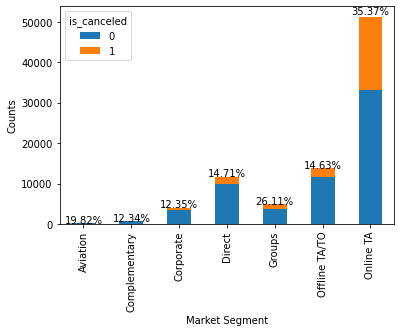

In [22]:
# PLOT for percentage of cancellations for each deposite type - Dropped due to less data for other deposite types 
df_2_crosstab = pd.crosstab(df_2['market_segment'], df_2['is_canceled'])
df_2_crosstab.plot(kind='bar',stacked=True)
data = df_2_crosstab
# Add the percentage values on top of each bar
ax = plt.gca()
for i,x in enumerate(data.values):
  plt.text(i,(x[0]+x[1])*1.01,'{:.2%}'.format(x[1]/(x[0]+x[1])), ha='center')
ax.set_ylabel("Counts")
ax.set_xlabel("Market Segment")
ax.legend(title='is_canceled')
plt.show()

## VIZ -2

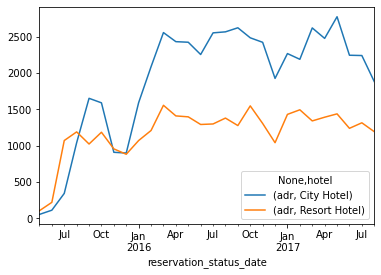

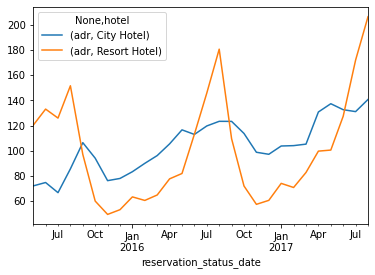

In [81]:
# Calculating the count of bookings by month using pd.Grouper
bookings_by_month = df_2[['reservation_status_date','adr','hotel']].groupby([pd.Grouper(key='reservation_status_date', freq='M'),'hotel']).count()
bookings_by_month.unstack().plot()
# Calculating the average of adr generated by month using pd.Grouper
adr_by_month = df_2[['reservation_status_date','adr','hotel']].groupby([pd.Grouper(key='reservation_status_date', freq='M'),'hotel']).mean()
adr_by_month.unstack().plot()

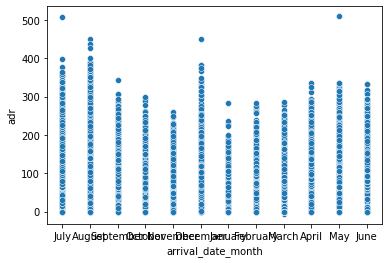

In [102]:
# Removing outlier in adr
sns.scatterplot(x='arrival_date_month',y='adr',data = df_2);
plt.show()
df_2 = df_2[df_2['adr']<1000]

## VIZ-3 Bivariate

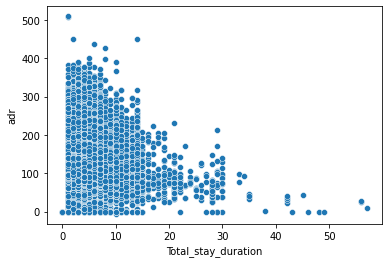

In [114]:
# Total stay duration vs adr sns.scatterplot
df_2['Total_stay_duration'] = df_2['stays_in_weekend_nights'] + df_2['stays_in_week_nights']
sns.scatterplot(x='Total_stay_duration',y='adr',data = df_2);

## VIZ -4 Bivariate

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


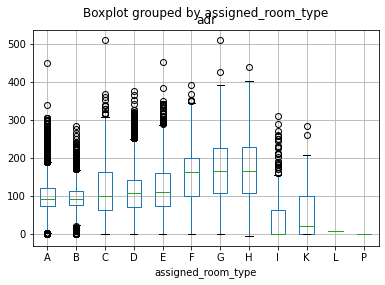

In [113]:
# Room type vs adr boxplot\
#bookings_by_room = df_2[['assigned_room_type','adr']].groupby('assigned_room_type').count().reset_index()#.plot()
df_2.boxplot(column='adr', by = 'assigned_room_type')
#sns.boxplot(x='assigned_room_type',y='adr',data = bookings_by_room);
#bookings_by_room.reset_index()

In [ ]:
sns.barplot(data = data, x =data.columns)

# CODE DUMP

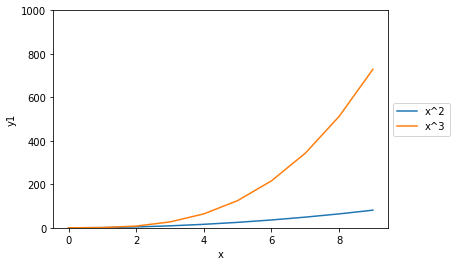

In [7]:
# Create some example data
x = range(10)
y1 = [i**2 for i in x]
y2 = [i**3 for i in x]
data = pd.DataFrame({'x':x,'y1':y1,'y2':y2})
df_2.groupby('adr')
# Create a line plot with two different scales
ax = sns.lineplot(x='x', y='y1', data=data, label='x^2',legend=False)
ax2 = sns.lineplot(x='x', y='y2', data=data, label='x^3',legend=False)
ax.set_ylim(0, 100)
ax2.set_ylim(0, 1000)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

## CROSS TAB EXPERIMENT AND ax.text() using bar height

In [ ]:
# PLOT for percentage of cancellations for each deposite type - Dropped due to less data for other deposite types 
df_2_crosstab = pd.crosstab(df_2['market_segment'], df_2['is_canceled'])
df_2_crosstab_melt = df_2_crosstab.melt(var_name='is_canceled',value_name='counts')
df_2_crosstab.plot(kind='bar',stacked=True)
# Add the percentage values on top of each bar
ax = plt.gca()
def bar_label(rects):
    for rect in rects:
        height = rect.get_height()
        width = rect.get_width()
        ax.text(rect.get_x() + width/2.,height,
                '{:.2%}'.format(height/sum(df_2_crosstab.sum())),
                ha='center', va='top')
for i in ax.containers:
  bar_label(i)

ax.set_ylabel("Counts")
ax.set_xlabel("Market Segment")
ax.legend(title='is_canceled')
plt.show()


for i in ax.containers:
  for t in i:
    print(t.get_height())